## **Floorplans bedroom number prediction using resnet34**

**To use:**

> run the first cell to create the folders.
>then, upload oneurls.csc,twourls.csv,threeurls.csv,foururls.csv to floorplans folder (under data)
>then run the rest of the notebook.
>model will be saved as export.pkl

In [ ]:
from fastai.vision import *
path = Path('data/floorplans')
path.mkdir(parents=True,exist_ok=True)
classes = ['one','two','three','four']

In [ ]:
for c in classes:
  folder = c
  file = c + 'urls.csv'
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)
  download_images(path/file, dest, max_pics=200)

In [ ]:

for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

one


two


three


four


cannot identify image file <_io.BufferedReader name='data/floorplans/four/00000034.jpg'>


In [ ]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, size=500, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
data.classes

['four', 'one', 'three', 'two']

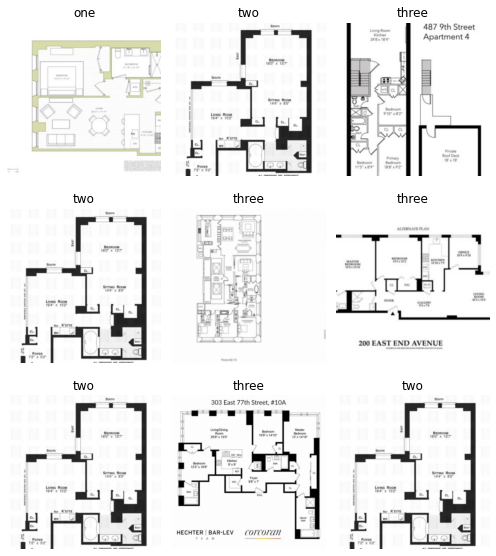

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.891184,1.360377,0.421429,00:44
1,1.358454,0.794127,0.278571,00:31
2,1.022015,0.785649,0.235714,00:30
3,0.829303,0.730114,0.235714,00:31
4,0.661601,0.816343,0.221429,00:31
5,0.562315,0.855948,0.257143,00:31
6,0.466262,0.847766,0.242857,00:31
7,0.400688,0.873315,0.242857,00:30
8,0.350774,0.879765,0.235714,00:31
9,0.307813,0.881755,0.242857,00:31


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


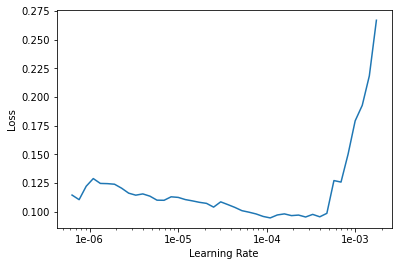

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(2e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.110935,1.106269,0.278571,00:38
1,0.088197,1.117492,0.271429,00:39


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


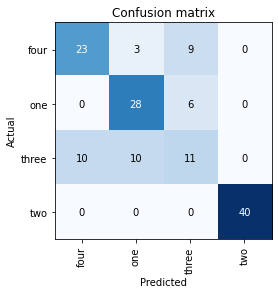

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
learn.export()